In [10]:
import json

In [11]:
with open ('./tunal.geojson', 'r', encoding='utf-8') as archivo:
    myJSON= json.load(archivo)

In [12]:
from shapely.geometry import shape

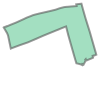

In [13]:
mygeometry = myJSON['features'][0]['geometry']
myBBox = shape(mygeometry)
myBBox

In [14]:
xmin, ymin, xmax, ymax = myBBox.bounds
myBBox.bounds

(-74.14097149888342, 4.5702652078990775, -74.12557700716575, 4.580548779686219)

In [ ]:
import requests
url = "https://geoportal.jbb.gov.co/agc/rest/services/SIGAU/CensoArbol/MapServer/0/query"
params = {
    "f": "json",
    "geometry": f"{xmin},{ymin},{xmax},{ymax}",
    "geometryType": "esriGeometryEnvelope",
    "spatialRel": "esriSpatialRelIntersects",
    "where": "1=1",
    "outFields": "*"
}
response = requests.get(url, params)
data = response.json()

{'displayFieldName': 'Codigo_Arbol',
 'fieldAliases': {'OBJECTID': 'OBJECTID',
  'Codigo_Arbol': 'Código Arbol',
  'Con_Especie_ID': 'Especie',
  'Nombre_Esp': 'Nombre Especie',
  'Altura_Total': 'Altura Total',
  'Tipo_Emplazamiento': 'Emplazamiento',
  'Codigo_UPZ': 'Codigo UPZ',
  'Codigo_Localidad': 'Codigo Localidad',
  'Fecha_Actualizacion': 'Actualización',
  'Latitud': 'Latitud',
  'Longitud': 'Longitud',
  'Cod_sist_emplaz': 'Sistema Emplazamiento',
  'Codigo_Scat': 'Codigo Sector Catastral',
  'Cod_uso_suelo': 'Tipo Uso Suelo'},
 'geometryType': 'esriGeometryPoint',
 'spatialReference': {'wkid': 4686, 'latestWkid': 4686},
 'fields': [{'name': 'OBJECTID',
   'type': 'esriFieldTypeOID',
   'alias': 'OBJECTID'},
  {'name': 'Codigo_Arbol',
   'type': 'esriFieldTypeString',
   'alias': 'Código Arbol',
   'length': 20},
  {'name': 'Con_Especie_ID',
   'type': 'esriFieldTypeInteger',
   'alias': 'Especie'},
  {'name': 'Nombre_Esp',
   'type': 'esriFieldTypeString',
   'alias': 'Nomb

In [ ]:
# Verificar si la respuesta es válida
if response.status_code == 200:
    data = response.json()
    
    geojson_data = {
        "type": "FeatureCollection",
        "features": []
    }

    for feature in data.get("features", []):
        geojson_feature = {
            "type": "Feature",
            "geometry": {
                "type": "Point",
                "coordinates": [
                    feature["geometry"]["x"],
                    feature["geometry"]["y"]
                ]
            },
            "properties": feature["attributes"]
        }
        geojson_data["features"].append(geojson_feature)

    # Guardar la respuesta en un archivo JSON
    with open("arboles.geojson", "w", encoding="utf-8") as file:
        json.dump(geojson_data, file, ensure_ascii=False, indent=4)

    print("✅ Archivo 'arboles.geojson' exportado correctamente.")
else:
    print(f"⚠️ Error en la solicitud: {response.status_code}")


✅ Archivo 'arboles.geojson' exportado correctamente.
